In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd

input_files = ['theta1_6dec_spectrum', 'theta1_6dec_spectrum2', 'theta1_6dec_spectrum3']
output_files = ['theta1_6dec_spectrum.csv', 'theta1_6dec_spectrum2.csv', 'theta1_6dec_spectrum3.csv']

dfs = []

for input_file, output_file in zip(input_files, output_files):
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        for line in infile:
            values = line.strip().split()
            outfile.write(','.join(values) + '\n')
    

    df = pd.read_csv(output_file, sep=',', header=None)
    df = df.iloc[:, :2]  
    df.columns = ['Pulseheight', 'Counts'] 
    df = df.apply(pd.to_numeric, errors='coerce')  
    dfs.append(df)

combined_df = pd.concat(dfs).groupby('Pulseheight', as_index=False).sum()

expanded_rows = []

for _, row in combined_df.iterrows():
    pulseheight = row['Pulseheight']
    counts = int(row['Counts']) 
    expanded_rows.extend([pulseheight] * counts)  


expanded_df = pd.DataFrame(expanded_rows, columns=['Pulseheight'])
expanded_output_file = 'combined_spectrum.csv'
expanded_df.to_csv(expanded_output_file, index=False)



Uitgebreide dataset opgeslagen in combined_spectrum.csv


In [6]:
pulseheight_compton_cesium = df['Pulseheight'].values
counts_compton_cesium = df['Counts'].values


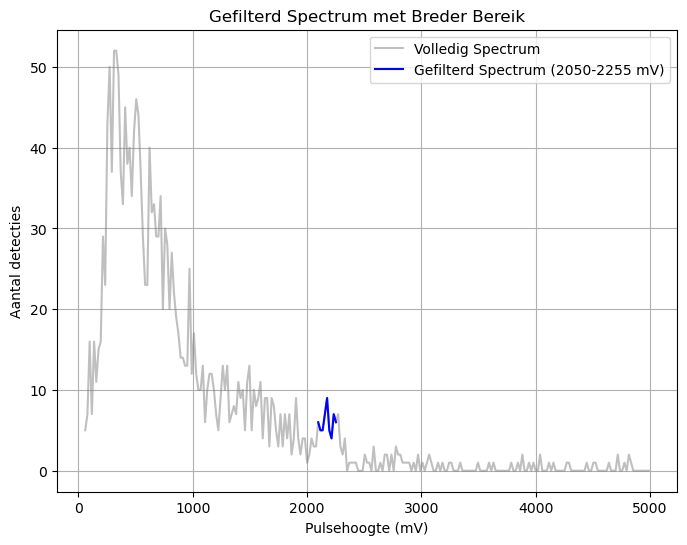

FWHM: 383.47 mV


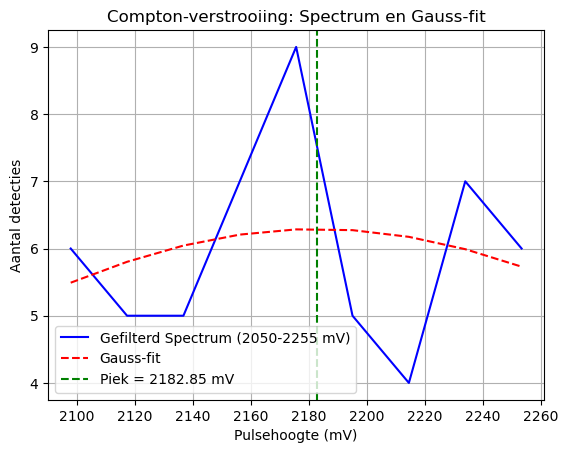

2182.8456617118213 54.26172424262369


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def gauss_function(x, amp, cen, width):
    return amp * np.exp(-(x - cen)**2 / (2 * width**2))


min_pulseheight = 2080  
max_pulseheight = 2255  


filtered_indices = (pulseheight_compton_cesium >= min_pulseheight) & (pulseheight_compton_cesium <= max_pulseheight)
filtered_pulseheight = pulseheight_compton_cesium[filtered_indices]
filtered_counts = counts_compton_cesium[filtered_indices]

plt.figure(figsize=(8, 6))
plt.plot(pulseheight_compton_cesium, counts_compton_cesium, label='Volledig Spectrum', color='gray', alpha=0.5)  # Volledige data in grijs
plt.plot(filtered_pulseheight, filtered_counts, label='Gefilterd Spectrum (2050-2255 mV)', color='blue')  # Gezoomde data in blauw
plt.xlabel('Pulsehoogte (mV)')
plt.ylabel('Aantal detecties')
plt.title('Gefilterd Spectrum met Breder Bereik')
plt.legend()
plt.grid(True)
plt.show()


p0 = [max(filtered_counts), np.mean(filtered_pulseheight), 10]  


params_gauss, covariance = curve_fit(gauss_function, filtered_pulseheight, filtered_counts, p0=p0)
amp, cen, width = params_gauss


fwhm_value = 2 * np.sqrt(2 * np.log(2)) * width
amp_error, cen_error, width_error = np.sqrt(np.diag(covariance))



plt.plot(filtered_pulseheight, filtered_counts, label='Gefilterd Spectrum (2050-2255 mV)', color='blue')
plt.plot(filtered_pulseheight, gauss_function(filtered_pulseheight, *params_gauss), label='Gauss-fit', color='red', linestyle='--')
plt.axvline(cen, color='green', linestyle='--', label=f'Piek = {cen:.2f} mV') 
plt.xlabel('Pulsehoogte (mV)')
plt.ylabel('Aantal detecties')
plt.title('Compton-verstrooiing: Spectrum en Gauss-fit')
plt.legend()
plt.grid(True)
plt.show()


print(cen, cen_error)

